### Linear Regression
* Gọi phương trình chính là y xác định :
 * Y = a*x1 + b * x2 + c * x3 +.... + constant(bias)
 * x1, x2, x3 là những thuộc tính của đối tượng được đề cập đến.
     * ví dụ : kinh nghiệm làm việc( thời gian x ) tỉ lệ thuận với mức lương.
 * Mục đích đi tìm a, b, c, .... constant sao cho những hệ số này là tối ưu nhất ( tại đó sai số Y và y là nhỏ nhất).

* Một số quy định y là giá trị thực của outcome(dựa theo tập training data), Y là giá trị của mô hình dự đoán.

* Sai số dự đoán: e 
    * Công thức: 
     * $\frac{1}{2}$ * $e^{2}$ = $\frac{1}{2}$* $(y - Y)^{2}$
     * $\frac{1}{2}$ để thuận cho việc tính toán, bình phương vì sai số có thể âm.
     
* Nhắc lại về nhân ma trận :
 * w = [a b c bias] 
 * x = [1 x3 x2 x1]
 * a*x1 + b * x2 + c * x3  + bias = Tran(x) * w


##### Ví dụ : Salary_Data là tập dữ liệu gồm  2 features  YearsExperience và Salary .

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
salaries = pd.read_csv("./Salary_Data.csv")

### Step 1
##### Look at the given data

In [3]:
salaries.head(10) 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 520.0 bytes


In [5]:
salaries.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Sketch diagram

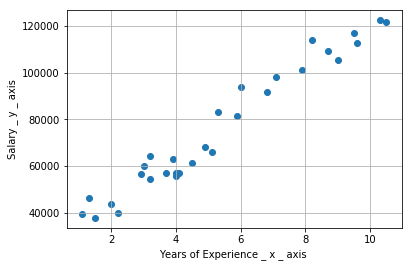

In [6]:
plt.scatter(x = salaries["YearsExperience"], y = salaries['Salary'] )

plt.xlabel("Years of Experience _ x _ axis ")
plt.ylabel("Salary _ y _ axis")

plt.grid()

#### Split dataset into Training and Testing test

In [7]:
from sklearn.model_selection import train_test_split

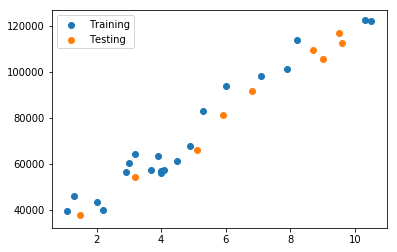

In [8]:
# double [[]] means 2 dimensions
X = salaries[['YearsExperience']] # 2 dimension such that we can use .fit below
y = salaries['Salary']

#random_state is the way to pick random. If set to default which is none, results will be different
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state= 101)

X_test = X_test.sort_index()
X_train = X_train.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

plt.scatter(X_train, y_train, label='Training')
plt.scatter(X_test, y_test, label='Testing')
plt.legend()
plt.show()

### Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train) # The data will be (X1, y1), (X2, y2), ....,

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
model.intercept_

25975.81465954113

https://machinelearningmastery.com/simple-linear-regression-tutorial-for-machine-learning/

In [12]:
model.coef_ 

array([9577.17174975])

https://towardsdatascience.com/interpreting-the-coefficients-of-linear-regression-cc31d4c6f235

In [13]:
# Prediction
predictions = model.predict(X_test)

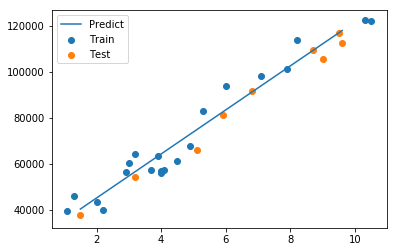

In [14]:
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.plot(X_test, predictions, label='Predict')
plt.legend()
plt.show()

## Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
#Create a poly object 
poly = PolynomialFeatures(degree=4)

In [17]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [18]:
X_train.head()

,YearsExperience
0,1.1
1,1.3
3,2.0
4,2.2
5,2.9


In [19]:
X_train_poly

array([[1.00000000e+00, 1.10000000e+00, 1.21000000e+00, 1.33100000e+00,
        1.46410000e+00],
       [1.00000000e+00, 1.30000000e+00, 1.69000000e+00, 2.19700000e+00,
        2.85610000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01],
       [1.00000000e+00, 2.20000000e+00, 4.84000000e+00, 1.06480000e+01,
        2.34256000e+01],
       [1.00000000e+00, 2.90000000e+00, 8.41000000e+00, 2.43890000e+01,
        7.07281000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01],
       [1.00000000e+00, 3.20000000e+00, 1.02400000e+01, 3.27680000e+01,
        1.04857600e+02],
       [1.00000000e+00, 3.70000000e+00, 1.36900000e+01, 5.06530000e+01,
        1.87416100e+02],
       [1.00000000e+00, 3.90000000e+00, 1.52100000e+01, 5.93190000e+01,
        2.31344100e+02],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02],
       [1.00000000e+00, 4.0000

In [20]:
poly_model = LinearRegression()

In [21]:
poly_model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
#Predicting
predictions_poly = poly_model.predict(X_test_poly)

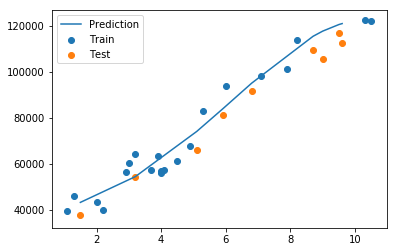

In [23]:
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.plot(X_test, predictions_poly, label='Prediction')
plt.legend()
plt.show()